In [ ]:
!kaggle datasets download -d ahmedkhanak1995/sign-language-gesture-images-dataset

Dataset URL: https://www.kaggle.com/datasets/ahmedkhanak1995/sign-language-gesture-images-dataset
License(s): EU ODP Legal Notice
 99% 188M/191M [00:02<00:00, 55.0MB/s]
100% 191M/191M [00:02<00:00, 68.4MB/s]


In [ ]:
!unzip sign-language-gesture-images-dataset

Streaming output truncated to the last 5000 lines.
  inflating: Gesture Image Pre-Processed Data/X/549.jpg  
  inflating: Gesture Image Pre-Processed Data/X/55.jpg  
  inflating: Gesture Image Pre-Processed Data/X/550.jpg  
  inflating: Gesture Image Pre-Processed Data/X/551.jpg  
  inflating: Gesture Image Pre-Processed Data/X/552.jpg  
  inflating: Gesture Image Pre-Processed Data/X/553.jpg  
  inflating: Gesture Image Pre-Processed Data/X/554.jpg  
  inflating: Gesture Image Pre-Processed Data/X/555.jpg  
  inflating: Gesture Image Pre-Processed Data/X/556.jpg  
  inflating: Gesture Image Pre-Processed Data/X/557.jpg  
  inflating: Gesture Image Pre-Processed Data/X/558.jpg  
  inflating: Gesture Image Pre-Processed Data/X/559.jpg  
  inflating: Gesture Image Pre-Processed Data/X/56.jpg  
  inflating: Gesture Image Pre-Processed Data/X/560.jpg  
  inflating: Gesture Image Pre-Processed Data/X/561.jpg  
  inflating: Gesture Image Pre-Processed Data/X/562.jpg  
  inflating: Gesture Im

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import random

In [ ]:
data_dir = '/content/Gesture Image Data'

In [ ]:
Name = os.listdir(data_dir)
print(Name)

['A', 'U', 'H', 'O', 'N', '5', 'I', 'B', '7', '2', '6', 'L', 'Q', '_', 'D', 'P', '9', '0', '8', 'K', 'V', 'G', '1', 'J', 'F', 'W', 'E', 'Z', 'X', 'Y', '3', '4', 'M', 'T', 'S', 'C', 'R']


In [ ]:
N=list(range(len(Name)))
normal_mapping=dict(zip(Name,N))
reverse_mapping=dict(zip(N,Name))

(50, 50, 3)


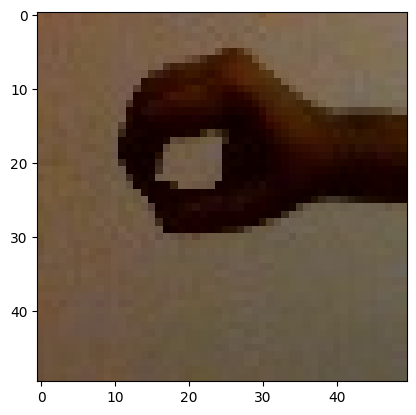

In [ ]:
path0='/content/Gesture Image Data/0/1.jpg'
image=cv2.imread(path0)
print(image.shape)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [ ]:
dataset1=[]
dataname=[]
count=0
for name in tqdm(os.listdir(data_dir)):
    path=os.path.join(data_dir,name)
    for im in os.listdir(path):
        image=cv2.imread(os.path.join(path,im))
        dataset1+=[image]
        dataname+=[count]
    count=count+1

data=np.array(dataset1)
dataname=np.array(dataname)

100%|██████████| 37/37 [00:04<00:00,  7.97it/s]


In [ ]:
# data=np.array(dataset)
# dataname=np.array(dataname)

In [ ]:
print(pd.Series(dataname).value_counts())

0     1500
19    1500
21    1500
22    1500
23    1500
24    1500
25    1500
26    1500
27    1500
28    1500
29    1500
30    1500
31    1500
32    1500
33    1500
34    1500
35    1500
20    1500
18    1500
1     1500
17    1500
2     1500
3     1500
4     1500
5     1500
6     1500
7     1500
8     1500
9     1500
10    1500
11    1500
12    1500
13    1500
14    1500
15    1500
16    1500
36    1500
Name: count, dtype: int64


In [ ]:
m=len(data)
M=list(range(m))
random.seed(2021)
random.shuffle(M)

In [ ]:
trainX=data[M[0:(m//4)*3]]
trainY0=dataname[M[0:(m//4)*3]]

testX=data[M[(m//4)*3:]]
testY0=dataname[M[(m//4)*3:]]

In [ ]:
labels1=to_categorical(trainY0)
trainY=np.array(labels1)

In [ ]:
trainx,testx,trainy,testy=train_test_split(trainX,trainY,test_size=0.2,random_state=44)

In [ ]:
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(33300, 50, 50, 3)
(8325, 50, 50, 3)
(33300, 37)
(8325, 37)


In [ ]:
datagen = ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.1,
    fill_mode='nearest'
)


In [ ]:
pretrained_model3 = tf.keras.applications.DenseNet201(input_shape=(50,50,3),include_top=False,weights='imagenet',pooling='avg')
pretrained_model3.trainable = False

74836368/74836368 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
inputs3 = pretrained_model3.input
x3 = tf.keras.layers.Dense(128, activation='relu')(pretrained_model3.output)
outputs3 = tf.keras.layers.Dense(len(Name), activation='softmax')(x3)
model = tf.keras.Model(inputs=inputs3, outputs=outputs3)

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
his=model.fit(datagen.flow(trainx,trainy,batch_size=32),validation_data=(testx,testy),epochs=20)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1041/1041 ━━━━━━━━━━━━━━━━━━━━ 589s 540ms/step - accuracy: 0.5180 - loss: 1.6565 - val_accuracy: 0.8157 - val_loss: 0.5171
Epoch 2/20
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 557s 477ms/step - accuracy: 0.8121 - loss: 0.5621 - val_accuracy: 0.8579 - val_loss: 0.4041
Epoch 3/20
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 487s 462ms/step - accuracy: 0.8517 - loss: 0.4407 - val_accuracy: 0.9114 - val_loss: 0.2735
Epoch 4/20
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 482s 463ms/step - accuracy: 0.8680 - loss: 0.3914 - val_accuracy: 0.8957 - val_loss: 0.2938
Epoch 5/20
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 536s 515ms/step - accuracy: 0.8760 - loss: 0.3623 - val_accuracy: 0.8847 - val_loss: 0.3413
Epoch 6/20
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 560s 512ms/step - accuracy: 0.8829 - loss: 0.3382 - val_accuracy: 0.8901 - val_loss: 0.3197
Epoch 7/20
1026/1041 ━━━━━━━━━━━━━━━━━━━━ 5s 380ms/step - accuracy: 0.8881 - loss: 0.3200

In [ ]:
y_pred=model.predict(testx)
pred=np.argmax(y_pred,axis=1)
ground = np.argmax(testy,axis=1)
print(classification_report(ground,pred))

In [ ]:
model.save('sign_language.h5')

In [ ]:
pred2=model.predict(testX)
print(pred2.shape)

PRED=[]
for item in pred2:
    value2=np.argmax(item)
    PRED+=[value2]
print(pd.Series(PRED).value_counts())

In [ ]:
get_acc = his.history['accuracy']
value_acc = his.history['val_accuracy']
get_loss = his.history['loss']
validation_loss = his.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:
fig, axs = plt.subplots(3,3,figsize=(12,12))
for i in range(9):
    r=i//3
    c=i%3
    img1 = testX[i]
    ax=axs[r][c].axis("off")
    actual=reverse_mapping[testY0[i]]
    predict=reverse_mapping[PRED[i]]
    ax=axs[r][c].set_title(actual+'=='+predict)
    ax=axs[r][c].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
from google.colab import files
files.download('/content/sign_language.pkl')
